# Portfolio 4 

### Subtask 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing te reduced winequality data set using panda
reduced_wine = pd.read_csv('winequality-red-reduced.csv')

#returning the head of the data set
reduced_wine.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4


In [3]:
#printing info for the dataset to check number of columns, rows etc
reduced_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   free sulfur dioxide   1599 non-null   float64
 4   total sulfur dioxide  1599 non-null   float64
 5   density               1599 non-null   float64
 6   pH                    1599 non-null   float64
 7   sulphates             1599 non-null   float64
 8   alcohol               1599 non-null   float64
dtypes: float64(9)
memory usage: 112.6 KB


In [4]:
from sklearn.decomposition import SparsePCA as spca

In [5]:
#creating the sparce PCA with the parameters that we have been given
reduced_wine_SPCA = spca(alpha=5, random_state=0, n_components=3)

In [6]:
#fitting the sparce PCA to our dataset
reduced_wine_SPCA.fit(reduced_wine)

SparsePCA(alpha=5, n_components=3, random_state=0)

In [7]:
#returning the 3 components as arrays
reduced_wine_SPCA.components_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.99999587,
         0.        ,  0.        ,  0.        , -0.0028738 ],
       [ 0.        ,  0.        ,  0.        , -1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.99999353,  0.        , -0.00359734,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [8]:
from sklearn.preprocessing import StandardScaler

#Fitting and transforming our dataset to have a mean of 0 and a variance of 1 

scaler = StandardScaler(with_mean=True,with_std=True)

reduced_wine_scaled = scaler.fit_transform(reduced_wine)

print(reduced_wine_scaled)



[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [9]:
#checking that the mean is roughly 0
np.mean(reduced_wine_scaled, axis=0)

array([ 3.55493551e-16,  1.73303106e-16, -8.88733878e-17, -6.22113715e-17,
        4.44366939e-17,  2.36403212e-14,  2.86172309e-15,  6.75437748e-16,
        1.06648065e-16])

In [10]:
#Checking that the variance is roughly 1
np.var(reduced_wine_scaled, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
#fitting the scaled data set to our sparce PCA
scaled_reduced_wine_pca = reduced_wine_SPCA.fit(reduced_wine_scaled)

In [12]:
#returning the 3 components of the sparce PCA for the scaled dataset
scaled_reduced_wine_pca.components_

array([[-0.54175021,  0.29802658, -0.52629844,  0.        ,  0.        ,
        -0.30842943,  0.45963601, -0.18521027,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.70710678,  0.70710678,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.3921877 , -0.0984998 ,  0.        ,  0.        ,
         0.53151031,  0.        ,  0.        , -0.7443006 ]])

The results of the sparse PCA for the winequality_reduced data set compared to the scaled dataset shows a clear difference. The results are different because the scaled data set has been scaled to have a variance of 1. Sparse PCA works by using variance maximisations and sparsity. When the dataset is scaled, sparsity is promoted. This allows the sparse PCA trained on the scaled data to be more likely to capture the relationship between the variables.

Moreover, the database consists of data that are all in their own scales, therefore the standardisation is key in order to most accurately capture the key variance and the detail of the relationship between the components

The three components of the sparse PCA on the scaled data show relationships between specific columns. I believe the colleagues' suggestion was close but not entirely accurate. 

First component- fixed acidity, volatile acidity, citric acid, density, pH	and sulphates. 

Second component - free sulfur dioxide and total sulfur dioxide.

Third component - volatile acidity, citric acid, total sulfur dioxide and alcohol.

The second component is in line with the suggested latent variable: sulphur dioxide. However, the other twos components can not be categorised as acidity and alcohol content as per the colleagues' suggestion.

### Subtask 2

In [13]:
#importing full wine quality data set 
data = pd.read_csv('winequality-red-full.csv')

#returning the head of the data set
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
#standardize the data
from sklearn.preprocessing import StandardScaler
data = pd.DataFrame(StandardScaler().fit_transform(data))


#split the data into x and y, where y is the quality 

x = data.iloc[:,0:11]
y = data.iloc[:, -1]


In [15]:
from sklearn.decomposition import FactorAnalysis

#Running factor analysis with 3 components on the dataset 
factor_analysis = FactorAnalysis(n_components = 3)
full_wine_factor_analysis = factor_analysis.fit_transform(x)
FA_components = factor_analysis.components_

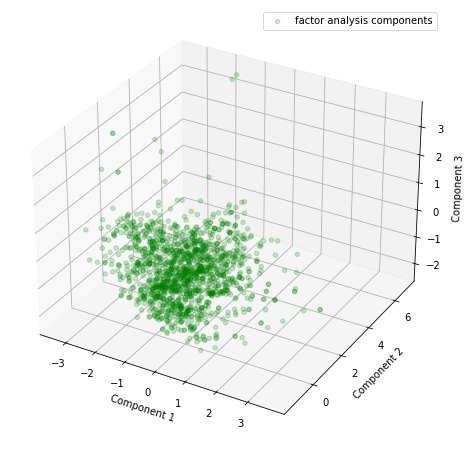

In [16]:
#Visualising the data in 3 dimensions
import matplotlib.pyplot as plt

fig = plt.figure(111,figsize = (10,8)).add_subplot(projection = '3d')

fig.scatter(full_wine_factor_analysis[:, 0],full_wine_factor_analysis[:, 1] , full_wine_factor_analysis[:, 2],
            label = 'factor analysis components', color = 'green', alpha = 0.2)

#naming the labels
fig.set_xlabel('Component 1')
fig.set_ylabel('Component 2')
fig.set_zlabel('Component 3')

plt.legend()

In [21]:
#average log likelihood of FA
factor_analysis.score(x)

-13.804233624967658

In [18]:
from sklearn.decomposition import PCA
#Running a pca on the dataset 
pca = PCA(n_components = 11)
data_pca = pca.fit_transform(x)
pca_components = pca.components_


In [22]:
print("explained variance ratio:\n\n", pca.explained_variance_ratio_)

explained variance ratio:

 [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]


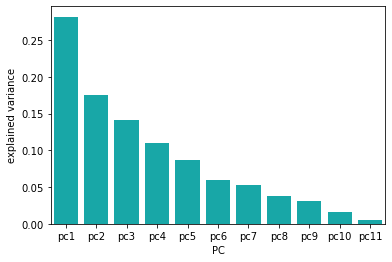

In [19]:
import seaborn as sns

#calculating the explained variance ratio for each component
explained_var_ratio = pd.DataFrame({'explained variance':pca.explained_variance_ratio_,
             'PC':['pc1','pc2','pc3','pc4','pc5','pc6',
                  'pc7','pc8','pc9','pc10','pc11']})

# plotting the ratio of the explained ratio each comonent accounts for 
sns.barplot(x='PC',y="explained variance", 
           data=explained_var_ratio, color="c");


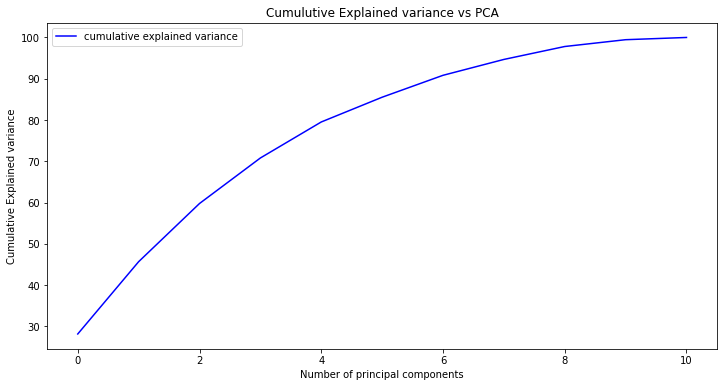

In [24]:

#Plotting a graph to show the cumulitive explained variance everytime we add a principle component
cum_var = np.cumsum(pca.explained_variance_ratio_)*100
ex = [n for n in range(len(cum_var+1))]
plt.figure(figsize=(12, 6))
plt.plot(ex,cum_var, color = 'b',label='cumulative explained variance')
plt.title('Cumulutive Explained variance vs PCA')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Number of principal components')


plt.legend(loc='best')

The factor analysis ran with 3 components(dimensions), it was not successful as the score returned a poor value. This means that it likely did not capture the details of the relationships in the orginal dataset. In order to get a good idea of the number of dimensions that would catch majority of the details I decided to use PCA with 11 components, this is the number of obeservations excluding the quality column. 
When calculating the explained variance we can see that the first 3 only captured around 60% of the explained variance. Through the different plots it is clear that around 7/8 components are required in order to explain majority of the variance and thus capture the datail of the relationships in the dataset.